In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [33]:
dt=0
rf=0
gbt=0
nb=0
knn=0
mlp

def NBTrain(X_train,y_train,X_test):  
    global nb
    nb=AdaBoostClassifier()
    nb.fit(X_train,y_train.tolist())
    prediction=nb.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
    return predictionDF

def DTTrain(X_train,y_train,X_test):  
    global dt
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train.tolist())

    prediction=dt.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
    
    return predictionDF

def KNN(X_train,y_train,X_test):  
    global knn
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train.tolist())
    prediction=knn.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
    
    return predictionDF

def RFTrain(X_train,y_train,X_test):  
    global rf
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train.tolist())

    prediction=rf.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
   
    return predictionDF

def GBTTrain(X_train,y_train,X_test):  
    global gbt
    gbt=GradientBoostingClassifier()
    gbt.fit(X_train,y_train.tolist())
    prediction=gbt.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
   
    return predictionDF

def MLP(X_train,y_train,X_test):  
    global mlp
    mlp=MLPClassifier()
    mlp.fit(X_train,y_train.tolist())
    prediction=mlp.predict(X_test)
    predictionDF=pd.DataFrame(prediction,columns=['Prediction'])
   
    return predictionDF

In [34]:
def encode_text_dummy(df,name):
    dummies=pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name="{}-{}".format(name,x)
        df[dummy_name]=dummies[x]
    df.drop(name,axis=1,inplace=True)

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

df=pd.read_csv('Train.csv')
encode_text_dummy(df,'service')
encode_text_dummy(df,'flag')
encode_text_dummy(df,'protocol_type')
df.dropna(inplace=True,axis=1)


features_df = pd.concat([df])
df.dropna(inplace=True,axis=1)
del features_df['outcome']

X = features_df.as_matrix()
Y = df['outcome']

kf = KFold(n_splits=5, shuffle=True) 
sum=0

for train_index, test_index in kf.split(X):
      #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
        
a=DTTrain(X_train,y_train,X_test)
b=GBTTrain(X_train,y_train,X_test)
c=RFTrain(X_train,y_train,X_test)
d=NBTrain(X_train,y_train,X_test)
e=KNN(X_train,y_train,X_test)
f=MLP(X_train,y_train,X_test)

predt=pd.concat([a,b,c,d,e,f,pd.DataFrame(y_test.tolist(),columns=['class'])],axis=1)
#pred=pd.concat([pred,predt])
predt.head()   

C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Code\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Code\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Prediction,Prediction,Prediction,Prediction,Prediction,Prediction,class
0,1,1,1,2,1,1,1
1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,1,1,1,1,1,1,1


In [37]:
x=predt.drop(['class'],axis=1).values
y=predt['class'].values
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
lr=DecisionTreeClassifier()
lr.fit(x,y)

df=pd.read_csv('Test.csv')
encode_text_dummy(df,'service')
encode_text_dummy(df,'flag')
encode_text_dummy(df,'protocol_type')
df.dropna(inplace=True,axis=1)

features_df = pd.concat([df])
del features_df['outcome']

x=features_df.as_matrix()
y=df['outcome'].tolist()


a=pd.DataFrame(dt.predict(x))
b=pd.DataFrame(rf.predict(x))
c=pd.DataFrame(gbt.predict(x))
d=pd.DataFrame(nb.predict(x))
e=pd.DataFrame(knn.predict(x))
f=pd.DataFrame(mlp.predict(x))

pred=pd.concat([a,b,c,d,e,f,pd.DataFrame(y,columns=['class'])],axis=1)
pred.head()


pred['finalPred']=lr.predict(pred.drop(['class'],axis=1).values)
pred.head()



avg=accuracy_score(y, pred['finalPred'])*100
print("Stacking-Test Set Accuracy:",avg)



C:\Users\Code\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Stacking-Test Set Accuracy: 56.70181358076761


Stacking/With K Fold
[[1893   74  186    1    0]
 [1125 3149   72    0    0]
 [ 670  166 1557   10    0]
 [2515    0  247  123    0]
 [  64    0    0    3    0]]
the recall for this model is : 1126.0
TP 3149
TN 1893
FP 74
FN 1125


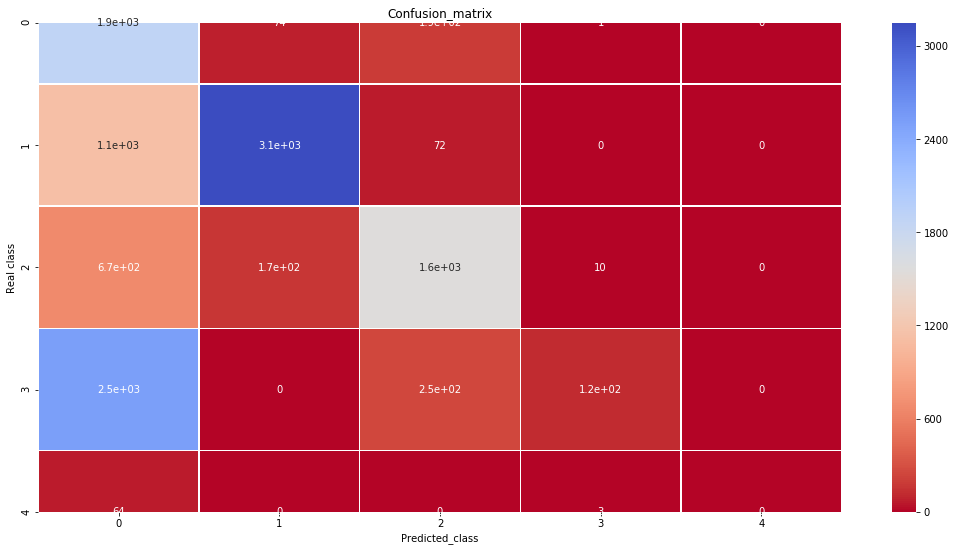

Stacking/With K Fold
              precision    recall  f1-score   support

           0       0.30      0.88      0.45      2154
           1       0.93      0.72      0.81      4346
           2       0.76      0.65      0.70      2403
           3       0.90      0.04      0.08      2885
           4       0.00      0.00      0.00        67

    accuracy                           0.57     11855
   macro avg       0.58      0.46      0.41     11855
weighted avg       0.77      0.57      0.54     11855

Stacking/With K Fold'- Accuracy is  56.70181358076761


In [42]:
print('Stacking/With K Fold')

print(confusion_matrix(y, pred['finalPred'])) 
#plot drawing
cnf_matrix=confusion_matrix(y, pred['finalPred'])
print("the recall for this model is :",cnf_matrix[1,1]/cnf_matrix[1,1]+cnf_matrix[1,0])
fig= plt.figure(figsize=(18,9))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('Stacking/With K Fold')
print(classification_report(y, pred['finalPred'])) 
print("Stacking/With K Fold'- Accuracy is ", accuracy_score(y, pred['finalPred'])*100)
